In [217]:
# Load packages

import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier


In [218]:
# Disable the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import yfinance as yf

# Define the ticker symbol for Ethereum in USD
ticker = 'BTC-USD'

# Download historical data (daily interval) for the specified period
dataset = yf.download(ticker, start='2015-01-01', end='2024-10-20', interval='1d')

# Show the first few rows of the data
print(dataset.head())

[*********************100%***********************]  1 of 1 completed

Price                         Adj Close         Close          High  \
Ticker                          BTC-USD       BTC-USD       BTC-USD   
Date                                                                  
2021-01-01 00:00:00+00:00  29374.152344  29374.152344  29600.626953   
2021-01-02 00:00:00+00:00  32127.267578  32127.267578  33155.117188   
2021-01-03 00:00:00+00:00  32782.023438  32782.023438  34608.558594   
2021-01-04 00:00:00+00:00  31971.914062  31971.914062  33440.218750   
2021-01-05 00:00:00+00:00  33992.429688  33992.429688  34437.589844   

Price                               Low          Open       Volume  
Ticker                          BTC-USD       BTC-USD      BTC-USD  
Date                                                                
2021-01-01 00:00:00+00:00  28803.585938  28994.009766  40730301359  
2021-01-02 00:00:00+00:00  29091.181641  29376.455078  67865420765  
2021-01-03 00:00:00+00:00  32052.316406  32129.408203  78665235202  
2021-01-04 00:00:

In [220]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)
dataset

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2021-01-01 00:00:00+00:00,29374.152344,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
1,2021-01-02 00:00:00+00:00,32127.267578,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2,2021-01-03 00:00:00+00:00,32782.023438,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
3,2021-01-04 00:00:00+00:00,31971.914062,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
4,2021-01-05 00:00:00+00:00,33992.429688,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...,...,...
1383,2024-10-15 00:00:00+00:00,67041.109375,67041.109375,67881.679688,64809.195312,66050.367188,48863870879
1384,2024-10-16 00:00:00+00:00,67612.718750,67612.718750,68375.289062,66758.726562,67042.460938,38195189534
1385,2024-10-17 00:00:00+00:00,67399.835938,67399.835938,67912.210938,66647.390625,67617.078125,32790898511


In [221]:
# Flatten multi-level columns
dataset.columns = ['_'.join(col).strip() for col in dataset.columns.values]


In [222]:
# Reset index to make Date a regular column, if it’s not already
dataset.reset_index(inplace=True)


In [223]:
# Save to CSV
dataset.to_csv('eth_cleaned_data.csv', index=False)


In [224]:
# dataset.drop(columns=['level_0', 'index', 'index_'], inplace=True)

In [225]:
dataset.shape

(1388, 8)

In [226]:
dataset.describe()

,index,Adj Close_BTC-USD,Close_BTC-USD,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1.388000e+03
mean,693.500000,40213.104423,40213.104423,41070.964333,39241.701946,40187.657611,3.170711e+10
std,400.825398,15733.618346,15733.618346,16076.835809,15330.971651,15720.510097,1.933624e+10
min,0.000000,15787.284180,15787.284180,16253.047852,15599.046875,15782.300781,5.331173e+09
25%,346.750000,26957.068848,26957.068848,27328.399414,26655.082031,26958.393555,1.919829e+10
50%,693.500000,38453.031250,38453.031250,39635.250000,37452.078125,38450.746094,2.825328e+10
75%,1040.250000,54156.595703,54156.595703,55938.595703,52656.408203,54059.711914,3.832984e+10
max,1387.000000,73083.500000,73083.500000,73750.070312,71334.093750,73079.375000,3.509679e+11


In [227]:
print(dataset.isnull().sum())

index                0
Date_                0
Adj Close_BTC-USD    0
Close_BTC-USD        0
High_BTC-USD         0
Low_BTC-USD          0
Open_BTC-USD         0
Volume_BTC-USD       0
dtype: int64


In [228]:
dataset

,index,Date_,Adj Close_BTC-USD,Close_BTC-USD,High_BTC-USD,Low_BTC-USD,Open_BTC-USD,Volume_BTC-USD
0,0,2021-01-01 00:00:00+00:00,29374.152344,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
1,1,2021-01-02 00:00:00+00:00,32127.267578,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2,2,2021-01-03 00:00:00+00:00,32782.023438,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
3,3,2021-01-04 00:00:00+00:00,31971.914062,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
4,4,2021-01-05 00:00:00+00:00,33992.429688,33992.429688,34437.589844,30221.187500,31977.041016,67547324782
...,...,...,...,...,...,...,...,...
1383,1383,2024-10-15 00:00:00+00:00,67041.109375,67041.109375,67881.679688,64809.195312,66050.367188,48863870879
1384,1384,2024-10-16 00:00:00+00:00,67612.718750,67612.718750,68375.289062,66758.726562,67042.460938,38195189534
1385,1385,2024-10-17 00:00:00+00:00,67399.835938,67399.835938,67912.210938,66647.390625,67617.078125,32790898511
1386,1386,2024-10-18 00:00:00+00:00,68418.789062,68418.789062,68969.750000,67177.820312,67419.109375,36857165014


In [229]:
dataset.columns = dataset.columns.str.replace('_', '', regex=False)
dataset.columns = dataset.columns.str.replace('-', '', regex=False)
dataset.columns = dataset.columns.str.replace('BTCUSD', '', regex=False)

In [230]:
dataset = dataset.dropna(axis=0)

In [231]:
# Make sure Date is the index before plotting
dataset.set_index('Date', inplace=True)

In [232]:
dataset.drop(columns="Adj Close", inplace=True)
dataset.drop(columns="index", inplace=True)

In [233]:
# Printing the start date and End date of the dataset

sd=dataset.index[0]
ed=dataset.index[-1]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2021-01-01 00:00:00+00:00
Ending Date 2024-10-19 00:00:00+00:00


In [234]:
# remove time from the data
dataset.index = pd.to_datetime(dataset.index).date

# Now, the time part is removed from the index
print(dataset.index)

Index([2021-01-01, 2021-01-02, 2021-01-03, 2021-01-04, 2021-01-05, 2021-01-06,
       2021-01-07, 2021-01-08, 2021-01-09, 2021-01-10,
       ...
       2024-10-10, 2024-10-11, 2024-10-12, 2024-10-13, 2024-10-14, 2024-10-15,
       2024-10-16, 2024-10-17, 2024-10-18, 2024-10-19],
      dtype='object', length=1388)


In [235]:
dataset.head()


,Close,High,Low,Open,Volume
2021-01-01,29374.152344,29600.626953,28803.585938,28994.009766,40730301359
2021-01-02,32127.267578,33155.117188,29091.181641,29376.455078,67865420765
2021-01-03,32782.023438,34608.558594,32052.316406,32129.408203,78665235202
2021-01-04,31971.914062,33440.218750,28722.755859,32810.949219,81163475344
2021-01-05,33992.429688,34437.589844,30221.187500,31977.041016,67547324782


In [236]:
dataset.info

<bound method DataFrame.info of                    Close          High           Low          Open  \
2021-01-01  29374.152344  29600.626953  28803.585938  28994.009766   
2021-01-02  32127.267578  33155.117188  29091.181641  29376.455078   
2021-01-03  32782.023438  34608.558594  32052.316406  32129.408203   
2021-01-04  31971.914062  33440.218750  28722.755859  32810.949219   
2021-01-05  33992.429688  34437.589844  30221.187500  31977.041016   
...                  ...           ...           ...           ...   
2024-10-15  67041.109375  67881.679688  64809.195312  66050.367188   
2024-10-16  67612.718750  68375.289062  66758.726562  67042.460938   
2024-10-17  67399.835938  67912.210938  66647.390625  67617.078125   
2024-10-18  68418.789062  68969.750000  67177.820312  67419.109375   
2024-10-19  68362.734375  68668.007812  68024.640625  68418.976562   

                 Volume  
2021-01-01  40730301359  
2021-01-02  67865420765  
2021-01-03  78665235202  
2021-01-04  81163475344

In [237]:
dataset.describe

<bound method NDFrame.describe of                    Close          High           Low          Open  \
2021-01-01  29374.152344  29600.626953  28803.585938  28994.009766   
2021-01-02  32127.267578  33155.117188  29091.181641  29376.455078   
2021-01-03  32782.023438  34608.558594  32052.316406  32129.408203   
2021-01-04  31971.914062  33440.218750  28722.755859  32810.949219   
2021-01-05  33992.429688  34437.589844  30221.187500  31977.041016   
...                  ...           ...           ...           ...   
2024-10-15  67041.109375  67881.679688  64809.195312  66050.367188   
2024-10-16  67612.718750  68375.289062  66758.726562  67042.460938   
2024-10-17  67399.835938  67912.210938  66647.390625  67617.078125   
2024-10-18  68418.789062  68969.750000  67177.820312  67419.109375   
2024-10-19  68362.734375  68668.007812  68024.640625  68418.976562   

                 Volume  
2021-01-01  40730301359  
2021-01-02  67865420765  
2021-01-03  78665235202  
2021-01-04  811634753

# **Preprocessing the data** 

# Adding the indicators

In [238]:
# making the exponential moving average
# first making the function to calculate the exponential MA of the Close column & then convert into a series

def EMA(df,n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA

dataset['EMA10'] = EMA(dataset, 10)
dataset['EMA30']= EMA(dataset, 30)
dataset['EMA200'] = EMA (dataset, 200)
dataset.tail()

,Close,High,Low,Open,Volume,EMA10,EMA30,EMA200
2024-10-15,67041.109375,67881.679688,64809.195312,66050.367188,48863870879,63677.245544,62482.677741,60229.613566
2024-10-16,67612.718750,68375.289062,66758.726562,67042.460938,38195189534,64392.786127,62813.648129,60303.077370
2024-10-17,67399.835938,67912.210938,66647.390625,67617.078125,32790898511,64939.522456,63109.531213,60373.691951
2024-10-18,68418.789062,68969.750000,67177.820312,67419.109375,36857165014,65572.116384,63452.063977,60453.742744
2024-10-19,68362.734375,68668.007812,68024.640625,68418.976562,14443497908,66079.501474,63768.881422,60532.439252


In [239]:
# Compact calculation of Rate of Change
dataset['ROC10'] = dataset['Close'].pct_change(10) * 100
dataset['ROC30'] = dataset['Close'].pct_change(30) * 100

In [240]:
# Compute the momentum

dataset['MOM10'] = dataset['Close'].diff(10)
dataset['MOM30'] = dataset['Close'].diff(30)

In [241]:
# compute the Relative strength index
import talib

dataset['RSI10'] = talib.RSI(dataset['Close'], timeperiod=10)
dataset['RSI30'] = talib.RSI(dataset['Close'], timeperiod=30)
dataset['RSI200'] = talib.RSI(dataset['Close'], timeperiod=200)

In [242]:
#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).min()) / (high.rolling(n).max() - low.rolling(n).min())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD

dataset['%K10'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%D10'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 10)
dataset['%K30'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%D30'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 30)
dataset['%K200'] = STOK(dataset['Close'], dataset['Low'], dataset['High'], 200)
dataset['%D200'] = STOD(dataset['Close'], dataset['Low'], dataset['High'], 200)

In [243]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
dataset['MA21'] = MA(dataset, 10)
dataset['MA63'] = MA(dataset, 30)
dataset['MA252'] = MA(dataset, 200)

In [244]:
# Drop rows with NaNs
dataset.dropna(inplace=True)

# Verify no more NaNs
print(dataset.isnull().sum())

Close     0
High      0
Low       0
Open      0
Volume    0
EMA10     0
EMA30     0
EMA200    0
ROC10     0
ROC30     0
MOM10     0
MOM30     0
RSI10     0
RSI30     0
RSI200    0
%K10      0
%D10      0
%K30      0
%D30      0
%K200     0
%D200     0
MA21      0
MA63      0
MA252     0
dtype: int64


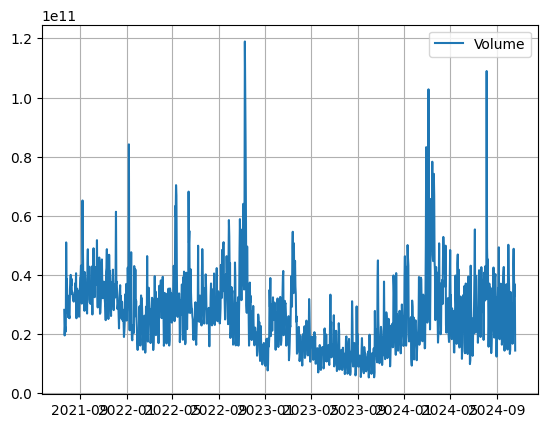

In [245]:
# Plot with Date on the x-axis
dataset[['Volume']].plot(grid=True)
plt.show()

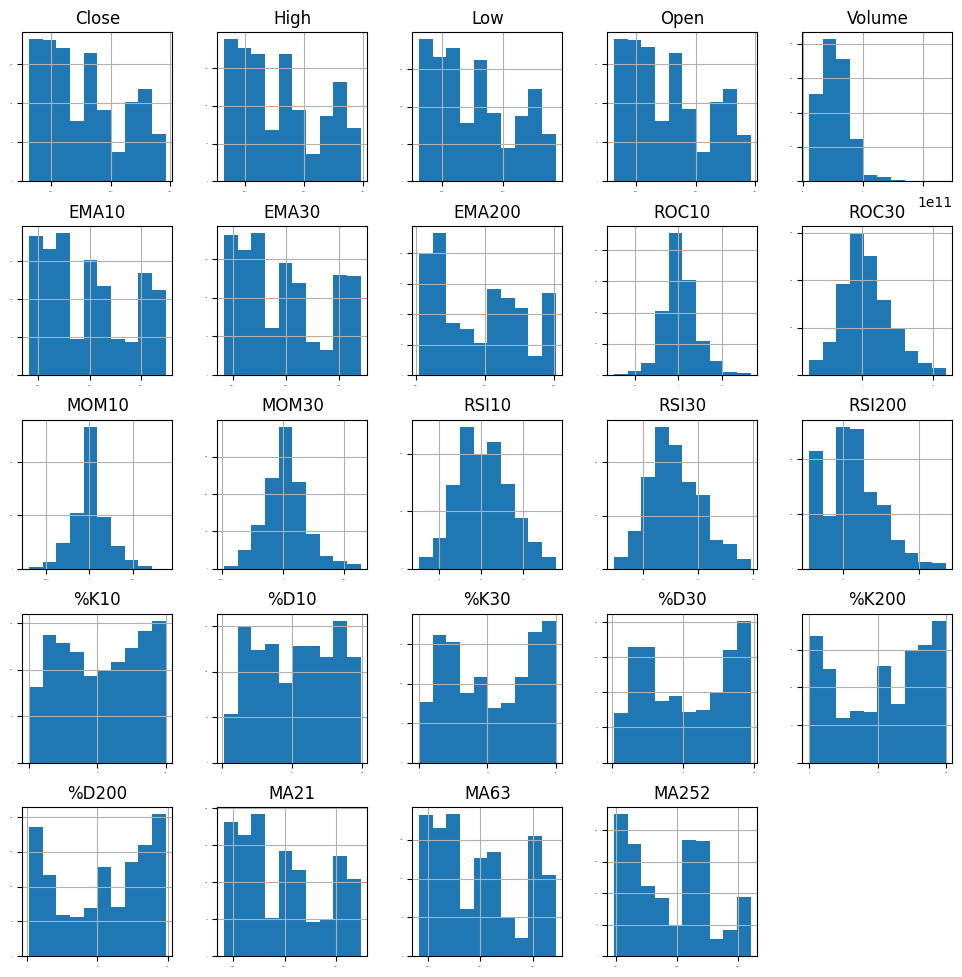

In [246]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

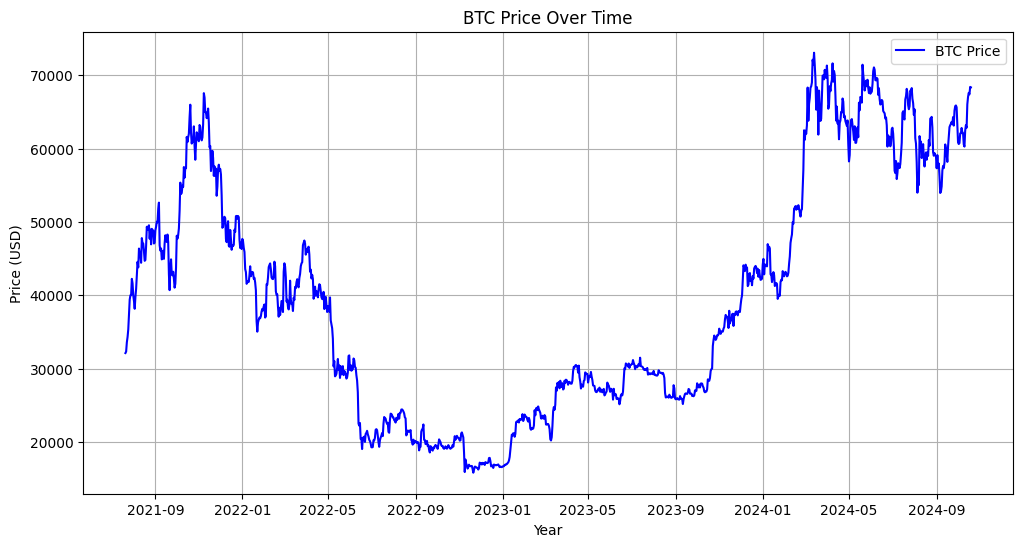

In [247]:
# Select the relevant column for plotting
eth_prices = dataset[['Close']]

import matplotlib.pyplot as plt

# Plot the Ethereum price
plt.figure(figsize=(12, 6))
plt.plot(eth_prices, label='BTC Price', color='blue')
plt.title('BTC Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


# Models and algorithms

# LSTM model

In [248]:
dataset['signal'] = (dataset['Close'].shift(-1) > dataset['Close']).astype(int)

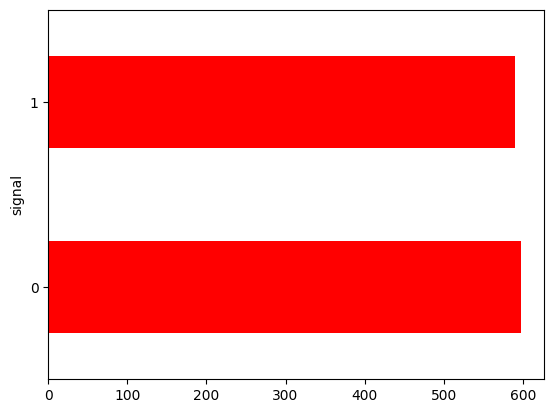

In [249]:
fig = plt.figure()
plot = dataset.groupby(['signal']).size().plot(kind='barh', color='red')
plt.show()

## Scale and train

In [250]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [251]:
# Columns to keep for scaling
columns_to_scale = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'EMA10', 'EMA30', 'EMA200',
    'ROC10', 'ROC30', 'MOM10', 'MOM30',
    'RSI10', 'RSI30', 'RSI200',
    '%K10', '%D10', '%K30', '%D30', '%K200', '%D200',
    'MA21', 'MA63', 'MA252'
]

# Filter the dataset
features_to_scale = dataset[columns_to_scale]


In [252]:
# Scale the features
scaled_features = scaler.fit_transform(features_to_scale)

# Convert back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

# Add the signal column (unchanged)
scaled_data['signal'] = dataset['signal'].values


In [253]:
# Check the first few rows
print(scaled_data.tail())

# Verify the range of the scaled columns
print(scaled_data.describe())


          Open      High       Low     Close    Volume     EMA10     EMA30  \
1182  0.877323  0.897936  0.882930  0.894541  0.383004  0.890576  0.891831   
1183  0.894638  0.906521  0.917909  0.904518  0.289140  0.904080  0.898301   
1184  0.904667  0.898467  0.915911  0.900802  0.241593  0.914398  0.904086   
1185  0.901212  0.916860  0.925428  0.918586  0.277368  0.926336  0.910783   
1186  0.918663  0.911612  0.940622  0.917608  0.080171  0.935912  0.916976   

        EMA200     ROC10     ROC30  ...      %K10      %D10      %K30  \
1182  0.992340  0.571813  0.527859  ...  0.906463  0.863267  0.919023   
1183  0.994198  0.567456  0.557951  ...  0.919561  0.934406  0.929045   
1184  0.995985  0.575900  0.512145  ...  0.897105  0.918776  0.897105   
1185  0.998009  0.599041  0.504096  ...  0.945312  0.932156  0.945312   
1186  1.000000  0.633638  0.479640  ...  0.939748  0.939109  0.939748   

          %D30     %K200     %D200      MA21      MA63     MA252  signal  
1182  0.839586  0

## Sequence length

In [254]:
sequence_length = 30

In [255]:
import numpy as np

# Initialize empty lists for sequences and targets
X = []
y = []

# Create sequences
for i in range(sequence_length, len(scaled_data)):
    # Extract sequence of past 30 days (all columns except 'signal')
    X.append(scaled_data.iloc[i-sequence_length:i, :-1].values)
    # Target is the 'signal' for the current day
    y.append(scaled_data.iloc[i, -1])  # 'signal' column

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Check the shapes
print("X shape:", X.shape)  # (number of samples, sequence_length, number of features)
print("y shape:", y.shape)  # (number of samples,)


X shape: (1157, 30, 24)
y shape: (1157,)


In [256]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check the shapes
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (925, 30, 24) (925,)
Testing data shape: (232, 30, 24) (232,)


In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2


## Model

In [258]:
# Initialize the model
model = Sequential()

# First LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.01)))
#model.add(Dropout(0.2))  # Add dropout to reduce overfitting

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=False))
#model.add(Dropout(0.2))

#model.add(BatchNormalization())

# Dense output layer (binary classification)
model.add(Dense(units=1, activation='sigmoid'))  # Sigmoid for binary classification


In [259]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 50)         │        15,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,251 (137.70 KB)

 Trainable params: 35,251 (137.70 KB)

 Non-trainable params: 0 (0.00 B)

In [260]:
history = model.fit(
    X_train, y_train,
    epochs=200,  # Number of training iterations
    batch_size=64,  # Number of samples per training batch
    validation_data=(X_test, y_test)  # Validation set
)


Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4928 - loss: 1.1243 - val_accuracy: 0.5043 - val_loss: 1.1141
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5262 - loss: 1.1122 - val_accuracy: 0.4957 - val_loss: 1.1042
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4939 - loss: 1.1016 - val_accuracy: 0.5086 - val_loss: 1.0940
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5043 - loss: 1.0906 - val_accuracy: 0.4612 - val_loss: 1.0844
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5020 - loss: 1.0819 - val_accuracy: 0.4828 - val_loss: 1.0747
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5014 - loss: 1.0714 - val_accuracy: 0.4828 - val_loss: 1.0654
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5126 - loss: 1.0621 - val_accuracy: 0.4828 - val_loss: 1.0564
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5237 - loss: 1.0528 - val_accuracy: 0.

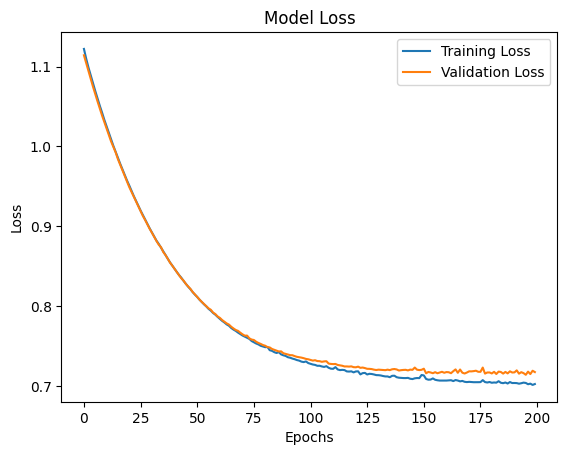

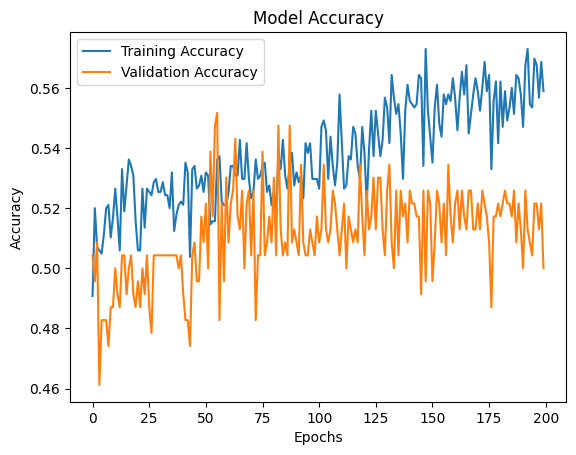

In [261]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Comparing the predicted results with real ones

In [262]:
# Predict probabilities for the test data
predicted_probs = model.predict(X_test)

# Convert probabilities to binary signals (1 = Buy, 0 = Don't Buy)
predicted_signals = (predicted_probs > 0.5).astype(int).flatten()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [263]:
# Extract the relevant dates and prices for the test set
test_dates = dataset.iloc[-len(y_test):].index
test_prices = dataset.iloc[-len(y_test):]['Close']

# Create a DataFrame to store predictions, actual signals, and prices
results = pd.DataFrame({
    'Date': test_dates,
    'Price': test_prices,
    'Predicted Signal': predicted_signals,
    'Actual Signal': y_test  # Optional: Include actual signals for comparison
})


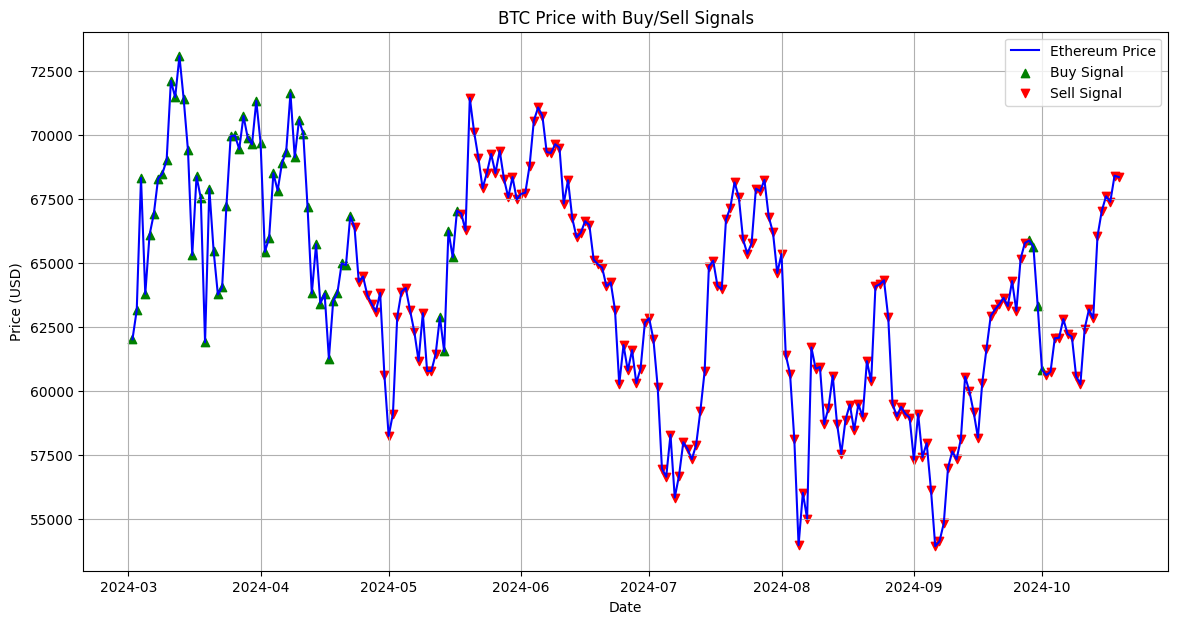

In [264]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Plot buy signals (green dots)
buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(buy_signals['Date'], buy_signals['Price'], color='green', label='Buy Signal', marker='^', alpha=1)

# Plot sell signals (red dots) if needed
sell_signals = results[results['Predicted Signal'] == 0]
plt.scatter(sell_signals['Date'], sell_signals['Price'], color='red', label='Sell Signal', marker='v', alpha=1)

plt.title('BTC Price with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


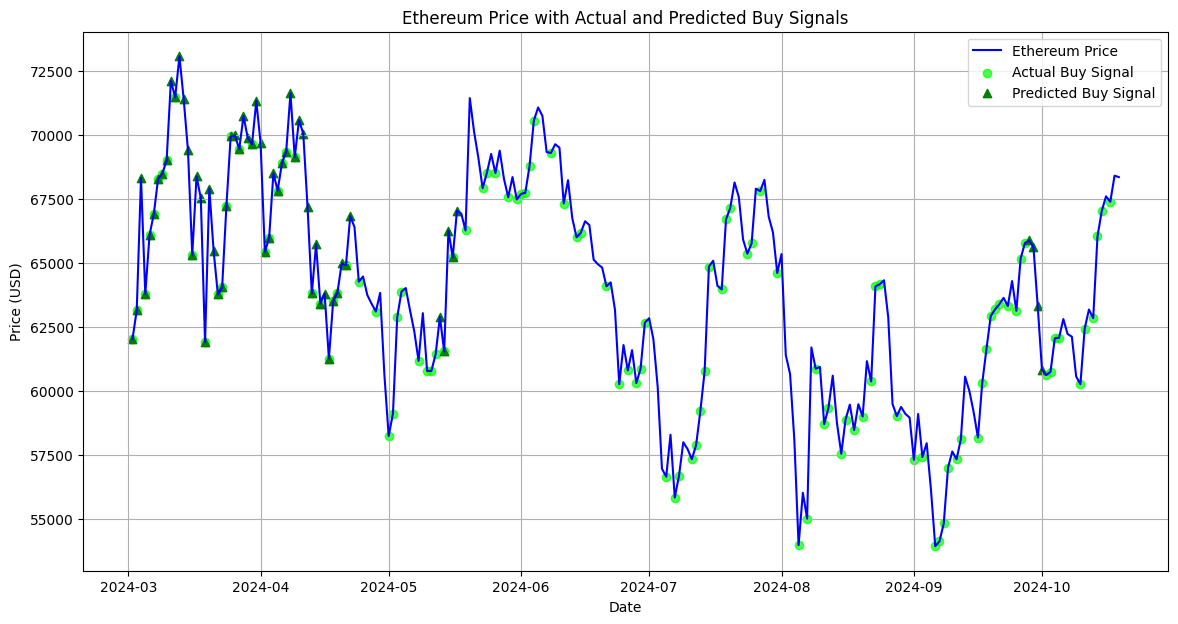

In [265]:
plt.figure(figsize=(14, 7))

# Plot Ethereum price
plt.plot(results['Date'], results['Price'], label='Ethereum Price', color='blue')

# Actual buy signals (green dots)
actual_buy_signals = results[results['Actual Signal'] == 1]
plt.scatter(actual_buy_signals['Date'], actual_buy_signals['Price'], color='lime', label='Actual Buy Signal', marker='o', alpha=0.7)

# Predicted buy signals (green triangles)
predicted_buy_signals = results[results['Predicted Signal'] == 1]
plt.scatter(predicted_buy_signals['Date'], predicted_buy_signals['Price'], color='green', label='Predicted Buy Signal', marker='^', alpha=1)

plt.title('Ethereum Price with Actual and Predicted Buy Signals')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [266]:
dataset.value_counts('signal')

signal
0    597
1    590
Name: count, dtype: int64